In [1]:
import pandas as pd
import seaborn as sns ; sns.set()
import matplotlib.pyplot as plt
import csv
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Reading original CSV
df_orig = pd.read_csv('181202034300_hardwareCsv_MAGNETIC_FIELD_SOURCE.csv')

In [3]:
#Checking the data
df_orig.head()

,4d3f969e-edf1-4096-80eb-7d3b8c7f77ad#MAGNETIC_FIELD_SOURCE#-12.718201,-6.2164307,62.046814#3#1538194954316
0,7aaec38a-2ee6-4dcb-b5ef-8b3a1037fe99#MAGNETIC_...,-12.576294,62.527466#3#1538195258969
1,b0f7f026-2c05-4979-a9fc-1027586f069f#MAGNETIC_...,-20.405579,53.93982#3#1538195608542
2,0c626d0c-fa9a-45ce-93a5-88ab75267349#MAGNETIC_...,-2.825928,125.75989#3#1538196141515
3,5c758af8-3f52-45d9-9f17-01378de83638#MAGNETIC_...,-52.175903,7.0632935#3#1538196696008
4,86c9ca2f-0f62-44ee-9b51-9372829df341#MAGNETIC_...,-0.175476,-34.48639#3#1538197016697


In [4]:
#Cleaning data steps
#Separating data by #|,
#Giving column headers that are "GUID","Source","x","y","z","Accuracy","Time"
df_cleaning = pd.read_csv('181202034300_hardwareCsv_MAGNETIC_FIELD_SOURCE.csv',
                        skipinitialspace=True, sep='#|,', engine='python', index_col=0, header=None,
                        names=["GUID","Source","x","y","z","Accuracy","TimeUnix"])

In [5]:
#Checking the cleaned data
df_cleaning.head()

,Source,x,y,z,Accuracy,TimeUnix
GUID,,,,,,
4d3f969e-edf1-4096-80eb-7d3b8c7f77ad,MAGNETIC_FIELD_SOURCE,-12.718201,-6.216431,62.046814,3,1538194954316
7aaec38a-2ee6-4dcb-b5ef-8b3a1037fe99,MAGNETIC_FIELD_SOURCE,-43.415833,-12.576294,62.527466,3,1538195258969
b0f7f026-2c05-4979-a9fc-1027586f069f,MAGNETIC_FIELD_SOURCE,-19.099426,-20.405579,53.939820,3,1538195608542
0c626d0c-fa9a-45ce-93a5-88ab75267349,MAGNETIC_FIELD_SOURCE,36.384583,-2.825928,125.759890,3,1538196141515
5c758af8-3f52-45d9-9f17-01378de83638,MAGNETIC_FIELD_SOURCE,3.775024,-52.175903,7.063293,3,1538196696008


In [6]:
#Adding UTC time converted from Unix time and checking values.
df_cleaning['TimeUTC'] = pd.to_datetime(df_cleaning['TimeUnix'], unit='ms', origin='unix')
df_cleaning.head()

,Source,x,y,z,Accuracy,TimeUnix,TimeUTC
GUID,,,,,,,
4d3f969e-edf1-4096-80eb-7d3b8c7f77ad,MAGNETIC_FIELD_SOURCE,-12.718201,-6.216431,62.046814,3,1538194954316,2018-09-29 04:22:34.316
7aaec38a-2ee6-4dcb-b5ef-8b3a1037fe99,MAGNETIC_FIELD_SOURCE,-43.415833,-12.576294,62.527466,3,1538195258969,2018-09-29 04:27:38.969
b0f7f026-2c05-4979-a9fc-1027586f069f,MAGNETIC_FIELD_SOURCE,-19.099426,-20.405579,53.939820,3,1538195608542,2018-09-29 04:33:28.542
0c626d0c-fa9a-45ce-93a5-88ab75267349,MAGNETIC_FIELD_SOURCE,36.384583,-2.825928,125.759890,3,1538196141515,2018-09-29 04:42:21.515
5c758af8-3f52-45d9-9f17-01378de83638,MAGNETIC_FIELD_SOURCE,3.775024,-52.175903,7.063293,3,1538196696008,2018-09-29 04:51:36.008


In [7]:
#Creating a new cleaned CSV
df_cleaning.to_csv('Cleaned.csv')

In [8]:
#Reading the new CSV
df_cleaned = pd.read_csv('Cleaned.csv', skipinitialspace=True, index_col=0, parse_dates=True)
df_cleaned.head()

,Source,x,y,z,Accuracy,TimeUnix,TimeUTC
GUID,,,,,,,
4d3f969e-edf1-4096-80eb-7d3b8c7f77ad,MAGNETIC_FIELD_SOURCE,-12.718201,-6.216431,62.046814,3,1538194954316,2018-09-29 04:22:34.316
7aaec38a-2ee6-4dcb-b5ef-8b3a1037fe99,MAGNETIC_FIELD_SOURCE,-43.415833,-12.576294,62.527466,3,1538195258969,2018-09-29 04:27:38.969
b0f7f026-2c05-4979-a9fc-1027586f069f,MAGNETIC_FIELD_SOURCE,-19.099426,-20.405579,53.939820,3,1538195608542,2018-09-29 04:33:28.542
0c626d0c-fa9a-45ce-93a5-88ab75267349,MAGNETIC_FIELD_SOURCE,36.384583,-2.825928,125.759890,3,1538196141515,2018-09-29 04:42:21.515
5c758af8-3f52-45d9-9f17-01378de83638,MAGNETIC_FIELD_SOURCE,3.775024,-52.175903,7.063294,3,1538196696008,2018-09-29 04:51:36.008


In [9]:
#Checking data types
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6061 entries, 4d3f969e-edf1-4096-80eb-7d3b8c7f77ad to b48e15bd-70f7-48f5-ab28-7e12af57c404
Data columns (total 7 columns):
Source      6061 non-null object
x           6061 non-null float64
y           6061 non-null float64
z           6061 non-null float64
Accuracy    6061 non-null int64
TimeUnix    6061 non-null int64
TimeUTC     6061 non-null object
dtypes: float64(3), int64(2), object(2)
memory usage: 307.8+ KB


In [10]:
# Checking Summary Statistics of data
df_cleaned.describe(include='all')

,Source,x,y,z,Accuracy,TimeUnix,TimeUTC
count,6061,6061.000000,6061.000000,6061.000000,6061.000000,6.061000e+03,6061
unique,1,NaN,NaN,NaN,NaN,NaN,5009
top,MAGNETIC_FIELD_SOURCE,NaN,NaN,NaN,NaN,NaN,2018-10-19 06:22:41.623
freq,6061,NaN,NaN,NaN,NaN,NaN,6
mean,NaN,-1.398462,-6.889489,-12.661346,2.387230,1.541116e+12,NaN
std,NaN,32.051874,30.600909,48.479860,1.209572,1.405796e+09,NaN
min,NaN,-491.894530,-186.190800,-182.292180,0.000000,1.538195e+12,NaN
25%,NaN,-16.598510,-23.551940,-52.587890,3.000000,1.540119e+12,NaN
50%,NaN,1.388550,-6.692505,-14.916992,3.000000,1.541096e+12,NaN
75%,NaN,13.555908,7.855225,26.231384,3.000000,1.542082e+12,NaN


In [11]:
#Adding year, month, day, weekday for time series analysis
df_cleaned['TimeUTC'] = pd.to_datetime(df_cleaned['TimeUTC'])
df_cleaned['Year'], df_cleaned['Month'] = df_cleaned['TimeUTC'].dt.year , df_cleaned['TimeUTC'].dt.month
df_cleaned['Day'] = df_cleaned['TimeUTC'].dt.day
df_cleaned['WeekDay'] = df_cleaned['TimeUTC'].dt.dayofweek
df_cleaned.head()

,Source,x,y,z,Accuracy,TimeUnix,TimeUTC,Year,Month,Day,WeekDay
GUID,,,,,,,,,,,
4d3f969e-edf1-4096-80eb-7d3b8c7f77ad,MAGNETIC_FIELD_SOURCE,-12.718201,-6.216431,62.046814,3,1538194954316,2018-09-29 04:22:34.316,2018,9,29,5
7aaec38a-2ee6-4dcb-b5ef-8b3a1037fe99,MAGNETIC_FIELD_SOURCE,-43.415833,-12.576294,62.527466,3,1538195258969,2018-09-29 04:27:38.969,2018,9,29,5
b0f7f026-2c05-4979-a9fc-1027586f069f,MAGNETIC_FIELD_SOURCE,-19.099426,-20.405579,53.939820,3,1538195608542,2018-09-29 04:33:28.542,2018,9,29,5
0c626d0c-fa9a-45ce-93a5-88ab75267349,MAGNETIC_FIELD_SOURCE,36.384583,-2.825928,125.759890,3,1538196141515,2018-09-29 04:42:21.515,2018,9,29,5
5c758af8-3f52-45d9-9f17-01378de83638,MAGNETIC_FIELD_SOURCE,3.775024,-52.175903,7.063294,3,1538196696008,2018-09-29 04:51:36.008,2018,9,29,5


In [31]:
df_cleaned_SortbyTimeUTC = df_cleaned.sort_values(by='TimeUTC')
df_cleaned_SortbyTimeUTC.head()

,Source,x,y,z,Accuracy,TimeUnix,TimeUTC,Year,Month,Day,WeekDay
GUID,,,,,,,,,,,
4d3f969e-edf1-4096-80eb-7d3b8c7f77ad,MAGNETIC_FIELD_SOURCE,-12.718201,-6.216431,62.046814,3,1538194954316,2018-09-29 04:22:34.316,2018,9,29,5
7aaec38a-2ee6-4dcb-b5ef-8b3a1037fe99,MAGNETIC_FIELD_SOURCE,-43.415833,-12.576294,62.527466,3,1538195258969,2018-09-29 04:27:38.969,2018,9,29,5
b0f7f026-2c05-4979-a9fc-1027586f069f,MAGNETIC_FIELD_SOURCE,-19.099426,-20.405579,53.939820,3,1538195608542,2018-09-29 04:33:28.542,2018,9,29,5
0c626d0c-fa9a-45ce-93a5-88ab75267349,MAGNETIC_FIELD_SOURCE,36.384583,-2.825928,125.759890,3,1538196141515,2018-09-29 04:42:21.515,2018,9,29,5
5c758af8-3f52-45d9-9f17-01378de83638,MAGNETIC_FIELD_SOURCE,3.775024,-52.175903,7.063294,3,1538196696008,2018-09-29 04:51:36.008,2018,9,29,5


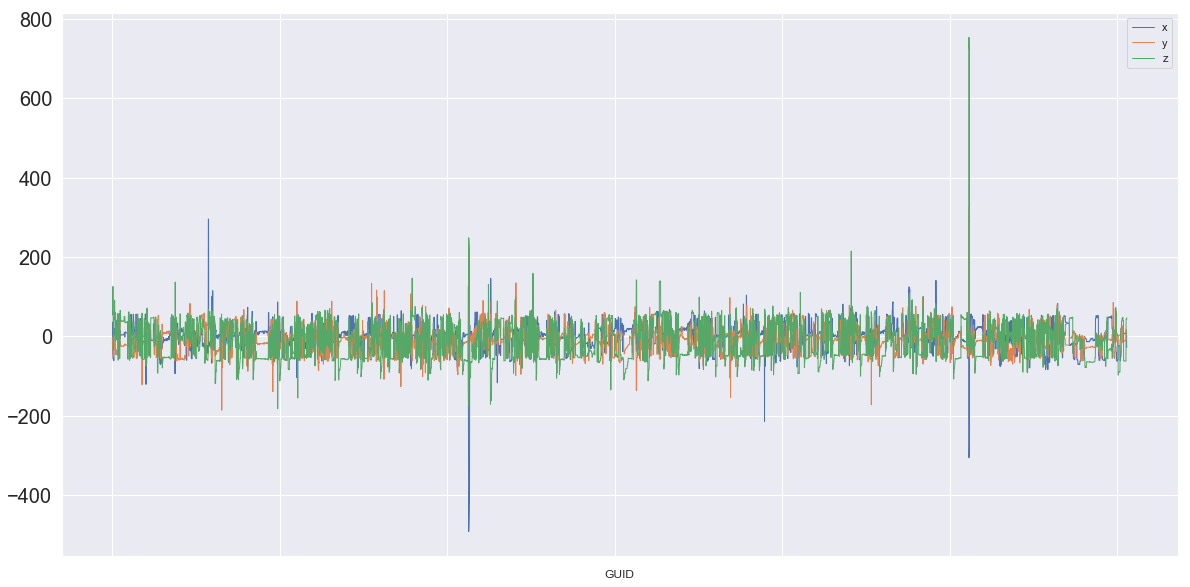

In [33]:
df_cleaned_SortbyTimeUTC[['x','y','z']].plot(figsize=(20,10), linewidth=1, fontsize=20);
# x and z seems to have big outliers. Y seems to be comparatively stable, although all the axis seems to be overlapping in the 
# range of +100 to -100

In [36]:
#Plotting x, y, z values on time.
df_cleaned_TimeUTCIndex = df_cleaned.set_index('TimeUTC')

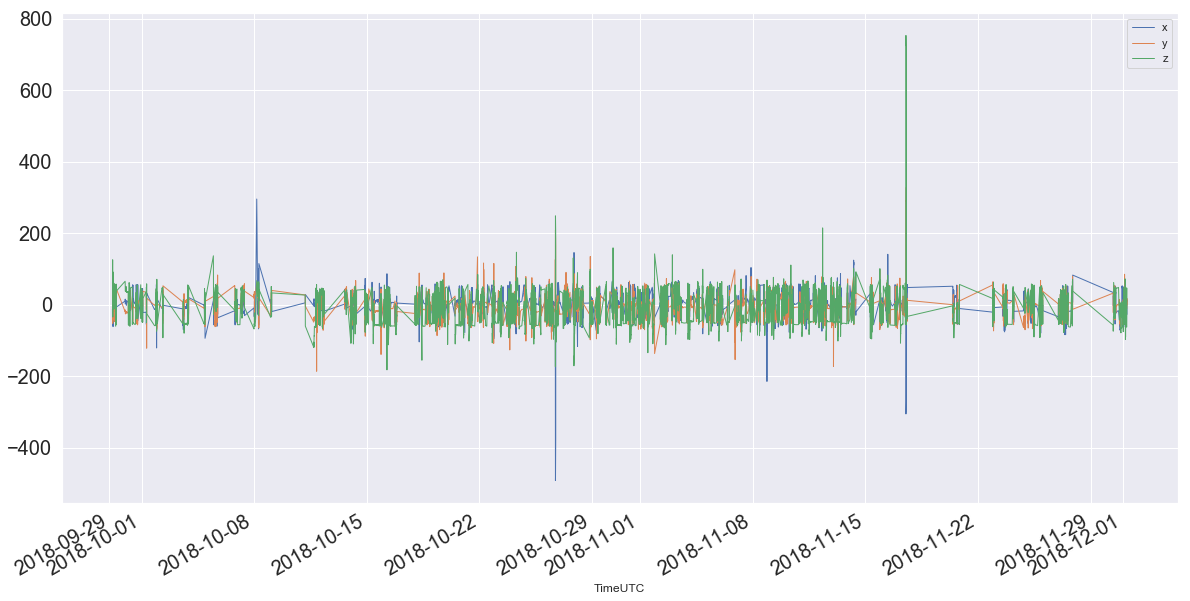

In [37]:
df_cleaned_TimeUTCIndex[['x','y','z']].plot(figsize=(20,10), linewidth=1, fontsize=20);
# On number of ocassions, there is very less variation in x, y, z dimensions of the magnetic field. Possible reasons could be
# holidays and therefore less moment or longer stays at home.

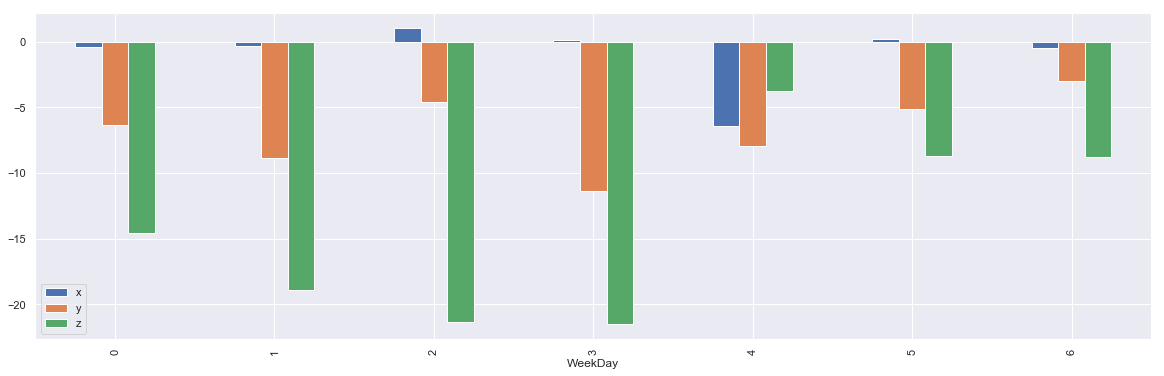

In [69]:
#Calculating Mean Variation by weekday. 0 means "Monday" and 6 means "Sunday"
dfct_gbwd = df_cleaned_TimeUTCIndex.groupby("WeekDay")[['x','y','z']].mean();
dfct_gbwd.plot(figsize=(20,6), kind='bar')
#friday, saturday and sunday seems to have less variation